In [1]:
import os,sys

In [2]:
os.chdir("..")
!pwd

/global/home/users/lizhen/mydev/rsna2020


In [3]:
import io
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [18]:
!ls ./input

sample_submission.csv  test.csv  train.csv  train3.tar.xz


# submission

In [22]:
df=pd.read_csv('input/sample_submission.csv')
df.shape

(152703, 2)

In [29]:
df['aid']=df['id'].map(lambda u: u.split('_')[0])
df['type']=df['id'].map(lambda u: "_".join(u.split('_')[1:]))

In [25]:
650*9+146853

152703

In [30]:
df.head()

id  label           aid  \
0  df06fad17bc3_negative_exam_for_pe    0.5  df06fad17bc3   
1  c8039e7f9e63_negative_exam_for_pe    0.5  c8039e7f9e63   
2  761f6f1a9f5b_negative_exam_for_pe    0.5  761f6f1a9f5b   
3  c8db5b1f6b56_negative_exam_for_pe    0.5  c8db5b1f6b56   
4  462e805da1f1_negative_exam_for_pe    0.5  462e805da1f1   

                   type  
0  negative_exam_for_pe  
1  negative_exam_for_pe  
2  negative_exam_for_pe  
3  negative_exam_for_pe  
4  negative_exam_for_pe

In [31]:
df['type'].value_counts()

                        146853
acute_and_chronic_pe       650
leftsided_pe               650
rv_lv_ratio_lt_1           650
rv_lv_ratio_gte_1          650
negative_exam_for_pe       650
chronic_pe                 650
central_pe                 650
rightsided_pe              650
indeterminate              650
Name: type, dtype: int64

In [33]:
df['type'].value_counts().index

Index(['', 'acute_and_chronic_pe', 'leftsided_pe', 'rv_lv_ratio_lt_1',
       'rv_lv_ratio_gte_1', 'negative_exam_for_pe', 'chronic_pe', 'central_pe',
       'rightsided_pe', 'indeterminate'],
      dtype='object')

# test

In [19]:
df=pd.read_csv('input/test.csv')
df.shape

(146853, 3)

In [20]:
df.head()

StudyInstanceUID SeriesInstanceUID SOPInstanceUID
0     df06fad17bc3      857e3d760445   c3163725fcf6
1     df06fad17bc3      857e3d760445   d54a8daaf836
2     df06fad17bc3      857e3d760445   bdc531b699cd
3     df06fad17bc3      857e3d760445   9e6a68e27df0
4     df06fad17bc3      857e3d760445   25e3307ba7da

In [21]:
for u in ['StudyInstanceUID', 'SeriesInstanceUID', 'SOPInstanceUID']:
    print(u)
    display(df[u].value_counts().to_frame())

StudyInstanceUID


StudyInstanceUID
84a57a6bc1b4               407
6d2f6f20b6f9               374
5575683813d4               335
80b639c896f8               315
0fd0bd70b8a4               313
...                        ...
b44cbf5371f2               115
274d5e835510               107
d2909eb50025                99
0cfc61e46f28                96
c8db5b1f6b56                87

[650 rows x 1 columns]

SeriesInstanceUID


SeriesInstanceUID
cf16044f2cda                407
61c2b435aa28                374
98cb0825c786                335
353eae7b20e8                315
30070329b486                313
...                         ...
8400a6d45964                115
265f21ae1567                107
fa71723ce59d                 99
f7b9822a6b03                 96
4f7b145076b3                 87

[650 rows x 1 columns]

SOPInstanceUID


SOPInstanceUID
48ef665b9198               1
523ba03736f5               1
4884e7ceef72               1
e42e2ef6d056               1
9393179af8e4               1
...                      ...
f2718fc05d2e               1
1accfd9b6574               1
d47c76e0c173               1
2bbc87d35f70               1
56cbacd372e6               1

[146853 rows x 1 columns]

# train

In [34]:
df=pd.read_csv('input/train.csv')
df.shape

(1790594, 17)

In [35]:
df.head()

StudyInstanceUID SeriesInstanceUID SOPInstanceUID  pe_present_on_image  \
0     6897fa9de148      2bfbb7fd2e8b   c0f3cb036d06                    0   
1     6897fa9de148      2bfbb7fd2e8b   f57ffd3883b6                    0   
2     6897fa9de148      2bfbb7fd2e8b   41220fda34a3                    0   
3     6897fa9de148      2bfbb7fd2e8b   13b685b4b14f                    0   
4     6897fa9de148      2bfbb7fd2e8b   be0b7524ffb4                    0   

   negative_exam_for_pe  qa_motion  qa_contrast  flow_artifact  \
0                     0          0            0              0   
1                     0          0            0              0   
2                     0          0            0              0   
3                     0          0            0              0   
4                     0          0            0              0   

   rv_lv_ratio_gte_1  rv_lv_ratio_lt_1  leftsided_pe  chronic_pe  \
0                  0                 1             1           0   
1                  0                 1             1           0   
2                  0                 1             1           0   
3                  0                 1             1           0   
4                  0                 1             1           0   

   true_filling_defect_not_pe  rightsided_pe  acute_and_chronic_pe  \
0                           0              1                     0   
1                           0              1                     0   
2                           0              1                     0   
3                           0              1                     0   
4                           0              1                     0   

   central_pe  indeterminate  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

In [37]:
target_columns=['acute_and_chronic_pe', 'leftsided_pe', 'rv_lv_ratio_lt_1',
       'rv_lv_ratio_gte_1', 'negative_exam_for_pe', 'chronic_pe', 'central_pe',
       'rightsided_pe', 'indeterminate']
len(target_columns)+3

12

In [38]:
df.columns.difference()

Index(['SOPInstanceUID', 'SeriesInstanceUID', 'StudyInstanceUID',
       'flow_artifact', 'pe_present_on_image', 'qa_contrast', 'qa_motion',
       'true_filling_defect_not_pe'],
      dtype='object')

In [44]:
set(target_columns).difference(df.columns)

set()

In [14]:
for u in ['StudyInstanceUID', 'SeriesInstanceUID', 'SOPInstanceUID']:
    print(u)
    display(df[u].value_counts().to_frame())

StudyInstanceUID


StudyInstanceUID
a1f123aa7434              1083
5d18f9dd1475              1056
9c57b55e770b              1034
12e36cd7932c               990
ca756b5cc209               828
...                        ...
98c93d32f030                87
3845443d4ddb                86
c8fbf1e08ac5                81
1ae6a23952ff                69
bc855cd8bdc9                63

[7279 rows x 1 columns]

SeriesInstanceUID


SeriesInstanceUID
e1c2dafcfe6f               1083
000fbdc26115               1056
3b4df6b4eb1d               1034
f9047d92fa38                990
a24bf4f78058                828
...                         ...
24ce383b3884                 87
bccf89711573                 86
275497911f02                 81
2b40732acc7a                 69
bab8e5153e7b                 63

[7279 rows x 1 columns]

SOPInstanceUID


SOPInstanceUID
916aea446912               1
711e95d71b87               1
b6c8db26fbba               1
e4c756b1964e               1
397d4e973652               1
...                      ...
9d51ca870c26               1
5632b771952d               1
5baa7ae026de               1
ef2b5e983a60               1
8c31c5a3c3a8               1

[1790594 rows x 1 columns]

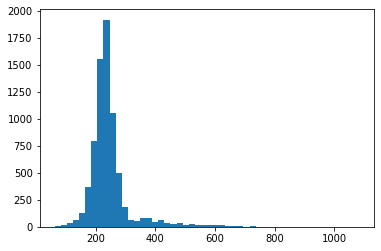

In [67]:
plt.hist(df['StudyInstanceUID'].value_counts(),bins=50);

In [17]:
for u in ['pe_present_on_image', 'negative_exam_for_pe', 'qa_motion',
       'qa_contrast', 'flow_artifact', 'rv_lv_ratio_gte_1', 'rv_lv_ratio_lt_1',
       'leftsided_pe', 'chronic_pe', 'true_filling_defect_not_pe',
       'rightsided_pe', 'acute_and_chronic_pe', 'central_pe', 'indeterminate']:
    print(u)
    display(df[u].value_counts().to_frame())

pe_present_on_image


pe_present_on_image
0              1694054
1                96540

negative_exam_for_pe


negative_exam_for_pe
1               1211145
0                579449

qa_motion


qa_motion
0    1775820
1      14774

qa_contrast


qa_contrast
0      1762308
1        28286

flow_artifact


flow_artifact
0        1718686
1          71908

rv_lv_ratio_gte_1


rv_lv_ratio_gte_1
0            1560055
1             230539

rv_lv_ratio_lt_1


rv_lv_ratio_lt_1
0           1478364
1            312230

leftsided_pe


leftsided_pe
0       1412960
1        377634

chronic_pe


chronic_pe
0     1718720
1       71874

true_filling_defect_not_pe


true_filling_defect_not_pe
0                     1776203
1                       14391

rightsided_pe


rightsided_pe
0        1329399
1         461195

acute_and_chronic_pe


acute_and_chronic_pe
0               1755752
1                 34842

central_pe


central_pe
0     1693063
1       97531

indeterminate


indeterminate
0        1753914
1          36680

In [42]:
l=[]
for u in ['pe_present_on_image', 'negative_exam_for_pe', 'qa_motion',
       'qa_contrast', 'flow_artifact', 'rv_lv_ratio_gte_1', 'rv_lv_ratio_lt_1',
       'leftsided_pe', 'chronic_pe', 'true_filling_defect_not_pe',
       'rightsided_pe', 'acute_and_chronic_pe', 'central_pe', 'indeterminate']:
    vc=df[u].value_counts()
    l.append([u,vc.loc[1]/len(df)])
display(pd.DataFrame(l).sort_values(1))

0         1
9   true_filling_defect_not_pe  0.008037
2                    qa_motion  0.008251
3                  qa_contrast  0.015797
11        acute_and_chronic_pe  0.019458
13               indeterminate  0.020485
8                   chronic_pe  0.040140
4                flow_artifact  0.040159
0          pe_present_on_image  0.053915
12                  central_pe  0.054469
5            rv_lv_ratio_gte_1  0.128750
6             rv_lv_ratio_lt_1  0.174372
7                 leftsided_pe  0.210899
10               rightsided_pe  0.257565
1         negative_exam_for_pe  0.676393

pe_present_on_image


StudyInstanceUID  v0  cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0   223   1   0.0    223    0.0
1     000f7f114264   0   239   1   0.0    239    0.0
2     00102474a2db   0   326   1   0.0    326    0.0
3     0038fd5f09f5   0   230   1   0.0    230    0.0
4     0045f113e031   0   257   1   0.0    257    0.0

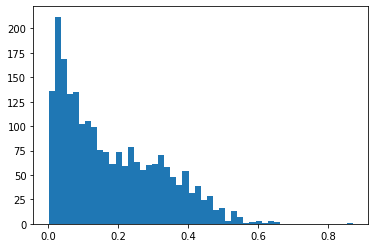

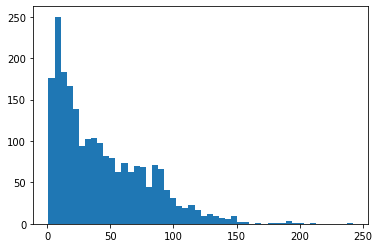

In [62]:
for u in ['pe_present_on_image']:
    print(u)
    x=df['StudyInstanceUID'].value_counts().to_dict()
    a=df.groupby('StudyInstanceUID')[u].value_counts().to_frame()
    a.columns=['cnt']
    a=a.reset_index();
    
    b0=a[a[u]==0]
    b0.columns=['StudyInstanceUID','v0','cnt0']
    b1=a[a[u]==1]
    b1.columns=['StudyInstanceUID','v1','cnt1']
    a=pd.merge(b0,b1, on='StudyInstanceUID', how='outer')
    a['total']=a['StudyInstanceUID'].map(b)
    a['v0']=0
    a['v1']=1
    a=a.fillna(0)
    a['ratio']=a['cnt1'].divide(a['total'])
    display(a.head())
    plt.hist(a[a['ratio']>0]['ratio'],bins=50);plt.show()
    plt.hist(a[a['cnt1']>0]['cnt1'],bins=50);plt.show()

acute_and_chronic_pe


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.9800796812749004 0.0199203187250996 0.0


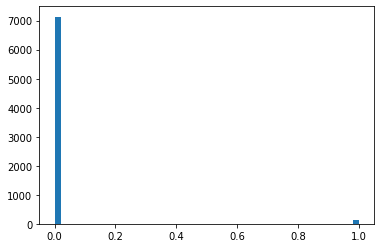

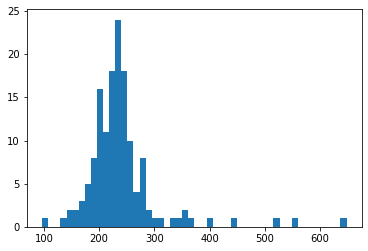

leftsided_pe


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.7878829509548014 0.2121170490451985 0.0


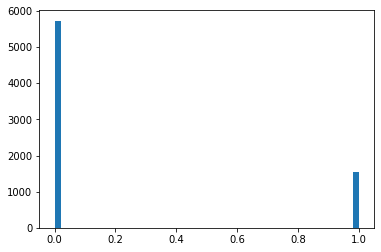

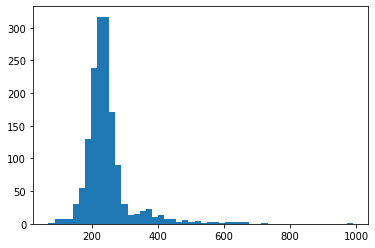

rv_lv_ratio_lt_1


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.8253881027613683 0.17461189723863169 0.0


rv_lv_ratio_gte_1


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.870861382057975 0.129138617942025 0.0


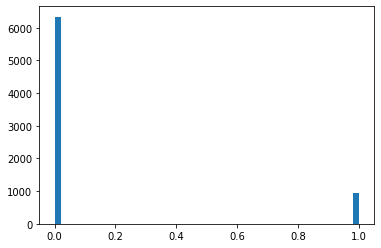

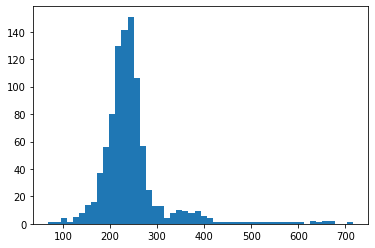

negative_exam_for_pe


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     004f9a1605e7   0  239.0   1   0.0    239    0.0
1     007a7645ced8   0  247.0   1   0.0    247    0.0
2     00c07cd8129d   0  235.0   1   0.0    235    0.0
3     00c38669b4fd   0  257.0   1   0.0    257    0.0
4     00c73e5a4e16   0  272.0   1   0.0    272    0.0

0.3253194120071438 0.6746805879928561 0.0


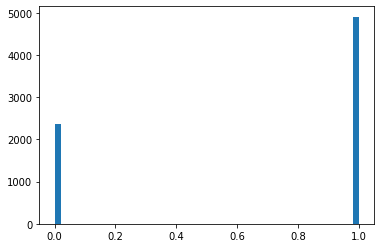

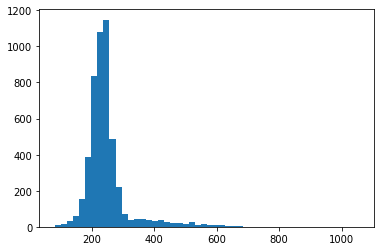

chronic_pe


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.9598845995329028 0.04011540046709713 0.0


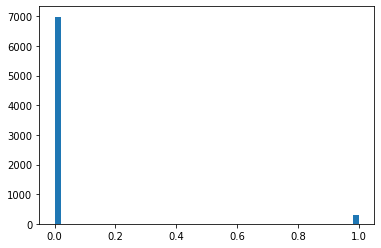

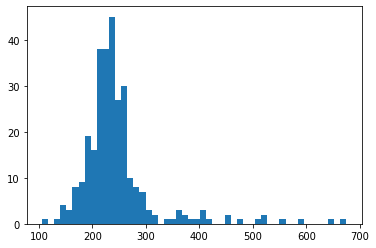

central_pe


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.9449100151119659 0.05508998488803407 0.0


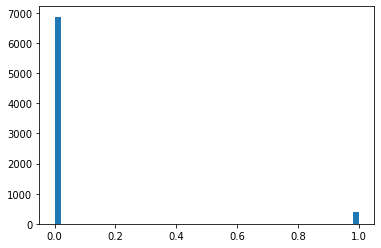

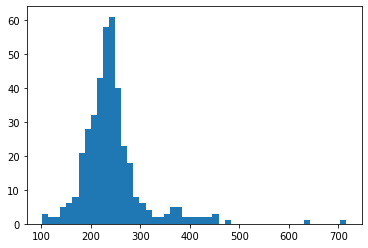

rightsided_pe


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.7424096716581948 0.2575903283418052 0.0


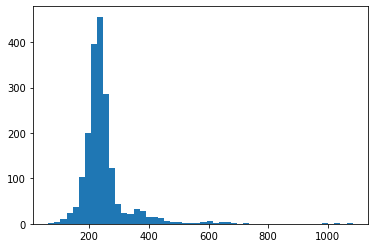

indeterminate


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.9784311031735129 0.021568896826487154 0.0


In [71]:
for u in target_columns:
    print(u)
    x=df['StudyInstanceUID'].value_counts().to_dict()
    a=df.groupby('StudyInstanceUID')[u].value_counts().to_frame()
    a.columns=['cnt']
    a=a.reset_index();
    
    b0=a[a[u]==0]
    b0.columns=['StudyInstanceUID','v0','cnt0']
    b1=a[a[u]==1]
    b1.columns=['StudyInstanceUID','v1','cnt1']
    a=pd.merge(b0,b1, on='StudyInstanceUID', how='outer')
    a['total']=a['StudyInstanceUID'].map(b)
    a['v0']=0
    a['v1']=1
    a=a.fillna(0)
    a['ratio']=a['cnt1'].divide(a['total'])
    display(a.head())
    print( (a['cnt0']==a['total']).mean(),(a['cnt1']==a['total']).mean(),
         ((a['cnt0']!=a['total']) & (a['cnt1']!=a['total'])).mean())
    plt.hist(a[a['ratio']>=0]['ratio'],bins=50);plt.show()
    plt.hist(a[a['cnt1']>0]['cnt1'],bins=50);plt.show()    
    #break

qa_contrast


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.9832394559692266 0.01676054403077346 0.0


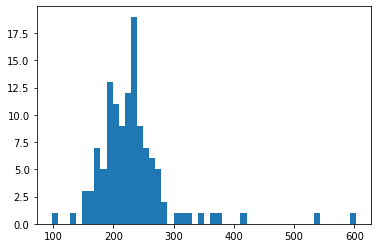

flow_artifact


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.959472455007556 0.040527544992444015 0.0


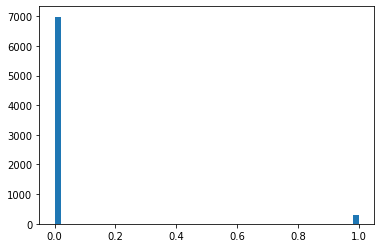

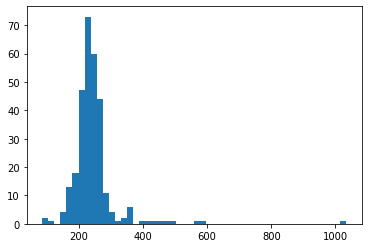

true_filling_defect_not_pe


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.9921692540184092 0.007830745981590878 0.0


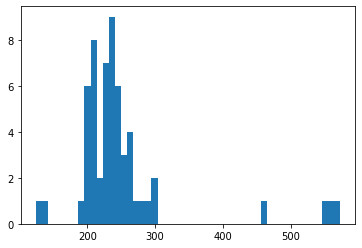

pe_present_on_image


StudyInstanceUID  v0  cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0   223   1   0.0    223    0.0
1     000f7f114264   0   239   1   0.0    239    0.0
2     00102474a2db   0   326   1   0.0    326    0.0
3     0038fd5f09f5   0   230   1   0.0    230    0.0
4     0045f113e031   0   257   1   0.0    257    0.0

0.6962494848193433 0.0 0.3037505151806567


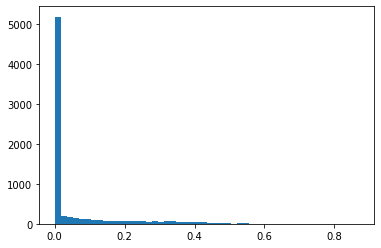

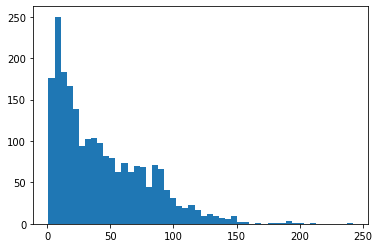

qa_motion


StudyInstanceUID  v0   cnt0  v1  cnt1  total  ratio
0     0003b3d648eb   0  223.0   1   0.0    223    0.0
1     000f7f114264   0  239.0   1   0.0    239    0.0
2     00102474a2db   0  326.0   1   0.0    326    0.0
3     0038fd5f09f5   0  230.0   1   0.0    230    0.0
4     0045f113e031   0  257.0   1   0.0    257    0.0

0.9913449649677153 0.008655035032284654 0.0


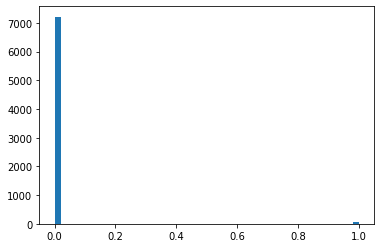

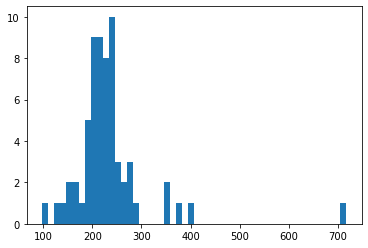

In [72]:
for u in set(['pe_present_on_image', 'negative_exam_for_pe', 'qa_motion',
       'qa_contrast', 'flow_artifact', 'rv_lv_ratio_gte_1', 'rv_lv_ratio_lt_1',
       'leftsided_pe', 'chronic_pe', 'true_filling_defect_not_pe',
       'rightsided_pe', 'acute_and_chronic_pe', 'central_pe', 'indeterminate']).difference(target_columns):
    print(u)
    x=df['StudyInstanceUID'].value_counts().to_dict()
    a=df.groupby('StudyInstanceUID')[u].value_counts().to_frame()
    a.columns=['cnt']
    a=a.reset_index();
    
    b0=a[a[u]==0]
    b0.columns=['StudyInstanceUID','v0','cnt0']
    b1=a[a[u]==1]
    b1.columns=['StudyInstanceUID','v1','cnt1']
    a=pd.merge(b0,b1, on='StudyInstanceUID', how='outer')
    a['total']=a['StudyInstanceUID'].map(b)
    a['v0']=0
    a['v1']=1
    a=a.fillna(0)
    a['ratio']=a['cnt1'].divide(a['total'])
    display(a.head())
    print( (a['cnt0']==a['total']).mean(),(a['cnt1']==a['total']).mean(),
         ((a['cnt0']!=a['total']) & (a['cnt1']!=a['total'])).mean())
    plt.hist(a[a['ratio']>=0]['ratio'],bins=50);plt.show()
    plt.hist(a[a['cnt1']>0]['cnt1'],bins=50);plt.show()    
    #break

In [73]:
target_columns

['acute_and_chronic_pe',
 'leftsided_pe',
 'rv_lv_ratio_lt_1',
 'rv_lv_ratio_gte_1',
 'negative_exam_for_pe',
 'chronic_pe',
 'central_pe',
 'rightsided_pe',
 'indeterminate']

# negative_exam_for_pe

In [75]:
a=df[df['negative_exam_for_pe']>0]
len(a)/len(df)

0.6763928618101033

In [81]:
a.drop(['StudyInstanceUID', 'SeriesInstanceUID', 'SOPInstanceUID'],1).drop(target_columns,1).drop_duplicates()

pe_present_on_image  qa_motion  qa_contrast  flow_artifact  \
124                       0          0            0              0   
1443                      0          0            0              1   
46845                     0          0            0              0   
307460                    0          0            0              1   

        true_filling_defect_not_pe  
124                              0  
1443                             0  
46845                            1  
307460                           1

In [82]:
a.drop(['StudyInstanceUID', 'SeriesInstanceUID', 'SOPInstanceUID'],1)[target_columns].drop_duplicates()

acute_and_chronic_pe  leftsided_pe  rv_lv_ratio_lt_1  rv_lv_ratio_gte_1  \
124                     0             0                 0                  0   

     negative_exam_for_pe  chronic_pe  central_pe  rightsided_pe  \
124                     1           0           0              0   

     indeterminate  
124              0

In [83]:
a=df[df['negative_exam_for_pe']==0]
len(a)/len(df)

0.3236071381898968

In [85]:
a.drop(['StudyInstanceUID', 'SeriesInstanceUID', 'SOPInstanceUID'],1).drop(target_columns+['pe_present_on_image'],1).drop_duplicates()

qa_motion  qa_contrast  flow_artifact  true_filling_defect_not_pe
0               0            0              0                           0
6192            1            1              1                           0
20413           0            0              1                           0
21386           0            1              0                           0
24812           0            0              0                           1
33649           1            1              0                           0
39387           1            0              0                           0
165235          0            1              1                           0
330940          0            0              1                           1
650050          1            0              1                           0

# indeterminate

In [91]:
a=df[df['indeterminate']==1]
len(a)/len(df)

0.020484822355039723

In [92]:
a[target_columns].drop_duplicates()

acute_and_chronic_pe  leftsided_pe  rv_lv_ratio_lt_1  rv_lv_ratio_gte_1  \
6192                     0             0                 0                  0   

      negative_exam_for_pe  chronic_pe  central_pe  rightsided_pe  \
6192                     0           0           0              0   

      indeterminate  
6192              1

In [93]:
a=df[df['indeterminate']==0]
len(a)/len(df)

0.9795151776449603

In [95]:
a[target_columns].drop_duplicates()

acute_and_chronic_pe  leftsided_pe  rv_lv_ratio_lt_1  \
0                           0             1                 1   
124                         0             0                 0   
269                         0             0                 1   
413                         0             1                 1   
710                         1             1                 0   
1298                        0             0                 1   
2339                        0             1                 0   
2862                        0             1                 0   
4788                        1             1                 1   
4960                        0             0                 0   
6565                        0             0                 1   
7039                        0             1                 0   
10815                       0             1                 0   
17239                       0             0                 0   
19562                       0             1                 1   
19957                       1             0                 1   
20099                       0             1                 1   
21021                       0             0                 0   
22052                       1             1                 1   
24812                       0             0                 0   
28796                       1             1                 0   
29876                       0             1                 1   
38397                       0             1                 1   
54554                       0             1                 0   
80872                       0             1                 1   
99715                       0             1                 0   
111980                      0             1                 0   
268124                      1             1                 1   
271178                      0             0                 0   
286226                      0             0                 0   
324071                      1             1                 0   
345602                      1             0                 0   
574916                      1             0                 1   
631698                      0             1                 1   
1218017                     0             0                 1   
1220442                     0             1                 0   
1419827                     0             0                 1   

         rv_lv_ratio_gte_1  negative_exam_for_pe  chronic_pe  central_pe  \
0                        0                     0           0           0   
124                      0                     1           0           0   
269                      0                     0           1           0   
413                      0                     0           0           0   
710                      1                     0           0           0   
1298                     0                     0           0           0   
2339                     1                     0           0           0   
2862                     1                     0           0           1   
4788                     0                     0           0           0   
4960                     1                     0           0           0   
6565                     0                     0           0           1   
7039                     1                     0           0           0   
10815                    1                     0           1           0   
17239                    1                     0           1           1   
19562                    0                     0           0           1   
19957                    0                     0           0           0   
20099                    0                     0           0           1   
21021                    1                     0           1           0   
22052                    0                     0           0           0   
24812             

# determinate

In [167]:
detdf=df[df['indeterminate']==0]
len(detdf)/len(df)

0.9795151776449603

In [168]:
n_study=df['StudyInstanceUID'].value_counts().shape[0]
b=detdf.groupby('StudyInstanceUID')['pe_present_on_image'].sum()
n_study, n_study-len(b),(b==0).sum(),(b>0).sum(),b.mean()

(7279, 157, 4911, 2211, 13.555181128896377)

## PE

In [169]:
a=detdf.drop(['SeriesInstanceUID', 'SOPInstanceUID'],1)[['StudyInstanceUID']+target_columns].drop_duplicates()
a=a.groupby(target_columns)[['StudyInstanceUID']].count()
a.columns=['count']
a=a.reset_index()
len(a)

37

In [170]:
a['count'].sum(),df[df['indeterminate']==0]['StudyInstanceUID'].value_counts().shape

(7122, (7122,))

In [171]:
g=a.groupby(['rightsided_pe','leftsided_pe','central_pe'])[['count']].sum()
g=g.reset_index().sort_values('count')
g

rightsided_pe  leftsided_pe  central_pe  count
1              0             0           1      4
3              0             1           1     15
5              1             0           1     36
2              0             1           0    317
7              1             1           1    346
4              1             0           0    627
6              1             1           0    866
0              0             0           0   4911

## RV/LV

In [173]:
a=detdf.drop(['SeriesInstanceUID', 'SOPInstanceUID'],1)[['StudyInstanceUID']+target_columns].drop_duplicates()
a=a.groupby(target_columns)[['StudyInstanceUID']].count()
a.columns=['count']
a=a.reset_index()
len(a)

37

In [174]:
g=a.groupby(['rv_lv_ratio_gte_1','rv_lv_ratio_lt_1'])[['count']].sum()
g=g.reset_index().sort_values('count')
g

rv_lv_ratio_gte_1  rv_lv_ratio_lt_1  count
2                  1                 0    940
1                  0                 1   1271
0                  0                 0   4911

## type

In [175]:
a=detdf.drop(['SeriesInstanceUID', 'SOPInstanceUID'],1)[['StudyInstanceUID']+target_columns].drop_duplicates()
a=a.groupby(target_columns)[['StudyInstanceUID']].count()
a.columns=['count']
a=a.reset_index()
len(a)

37

In [176]:
g=a.groupby(['chronic_pe','acute_and_chronic_pe'])[['count']].sum()
g=g.reset_index().sort_values('count')
g

chronic_pe  acute_and_chronic_pe  count
1           0                     1    145
2           1                     0    292
0           0                     0   6685

In [177]:
6685-4911

1774

In [172]:
df.columns

Index(['StudyInstanceUID', 'SeriesInstanceUID', 'SOPInstanceUID',
       'pe_present_on_image', 'negative_exam_for_pe', 'qa_motion',
       'qa_contrast', 'flow_artifact', 'rv_lv_ratio_gte_1', 'rv_lv_ratio_lt_1',
       'leftsided_pe', 'chronic_pe', 'true_filling_defect_not_pe',
       'rightsided_pe', 'acute_and_chronic_pe', 'central_pe', 'indeterminate'],
      dtype='object')